# *Conditional Plots*

**Here we are working with a data set of the passengers of the Titanic. The data set was compiled by Kaggle for their introductory data science competition, called *Titanic: Machine Learning from Disaster*. The goal of the competition is to build machine learning models that can predict if a passenger survives from their attributes.<br> It can be downloaded from their <a href="https://www.kaggle.com/c/titanic/data">data download</a> page.<br>It consists of two files - *train.csv* and *test.csv*. We will be working with *train.csv***

### Data Dictionary

> <font color=blue>***PassengerId***</font> -- A numerical id assigned to each passenger.<br>
> <font color=blue>***Survived***</font> -- Whether the passenger survived (1), or didn't (0).<br>
> <font color=blue>***Pclass***</font> -- The class the passenger was in.<br>
> <font color=blue>***Name***</font> -- the name of the passenger.<br>
> <font color=blue>***Sex***</font> -- The gender of the passenger -- male or female.<br>
> <font color=blue>***Age***</font> -- The age of the passenger. Fractional.<br>
> <font color=blue>***SibSp***</font> -- The number of siblings and spouses the passenger had on board.<br>
> <font color=blue>***Parch***</font> -- The number of parents and children the passenger had on board.<br>
> <font color=blue>***Ticket***</font> -- The ticket number of the passenger.<br>
> <font color=blue>***Fare***</font> -- How much the passenger paid for the ticket.<br>
> <font color=blue>***Cabin***</font> -- Which cabin the passenger was in.<br>
> <font color=blue>***Embarked***</font> -- Where the passenger boarded the Titanic.<br>

### Introduction To The Dataset

1. Read train.csv into a DataFrame named titanic. Keep only the following columns:
    - "Survived"
    - "Pclass"
    - "Sex"
    - "Age"
    - "SibSp"
    - "Parch"
    - "Fare"
    - "Embarked"
2. Use the DataFrame.dropna() method to remove rows containing missing values.

In [1]:
import pandas as pd

titanic = pd.read_csv("train.csv")
print(titanic.head())

data_col = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
titanic = titanic[data_col]
titanic.dropna(inplace=True)

titanic.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Creating Histograms in SeaBorn

1. Import seaborn as sns and matplotlib.pyplot as plt.
2. Use the seaborn.distplot() function to visualize the distribution of the "Age" column.
3. Display the plot using plt.show().

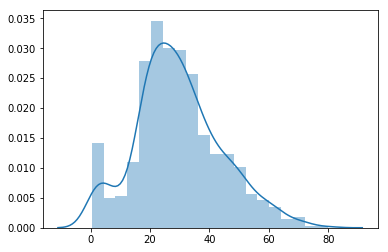

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(titanic['Age'].values)
plt.show()

### Generating a Kernel Density Plot

1. Generate a kernel density plot:
    - Using the values in the "Age" column
    - With the area under the curve shaded
2. Set the x-axis label to "Age" using pyplot.xlabel().

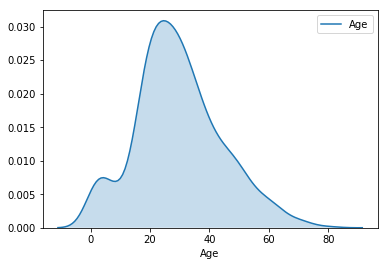

In [8]:
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')
plt.show()

### Modifying The Appearance of The Plots

1. Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
2. Generate a kernel density plot of the "Age" column, with the area under the curve shaded.
3. Set the x-axis label to "Age".
4. Despine all of the axes.

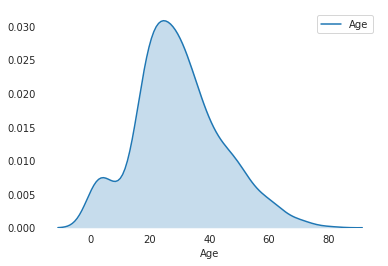

In [11]:
sns.set_style("white")
sns.kdeplot(titanic['Age'], shade=True)

plt.xlabel('Age')
sns.despine(left=True, bottom=True)

plt.show()

### Conditional Distributions Using a Single Condition

1. Use a FacetGrid instance to generate three plots on the same row:
    - One for each unique value of Pclass.
    - Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
    - Each plot should have a height of 6 inches.
2. Remove all of the spines using seaborn.despine().
3. Display the plots.

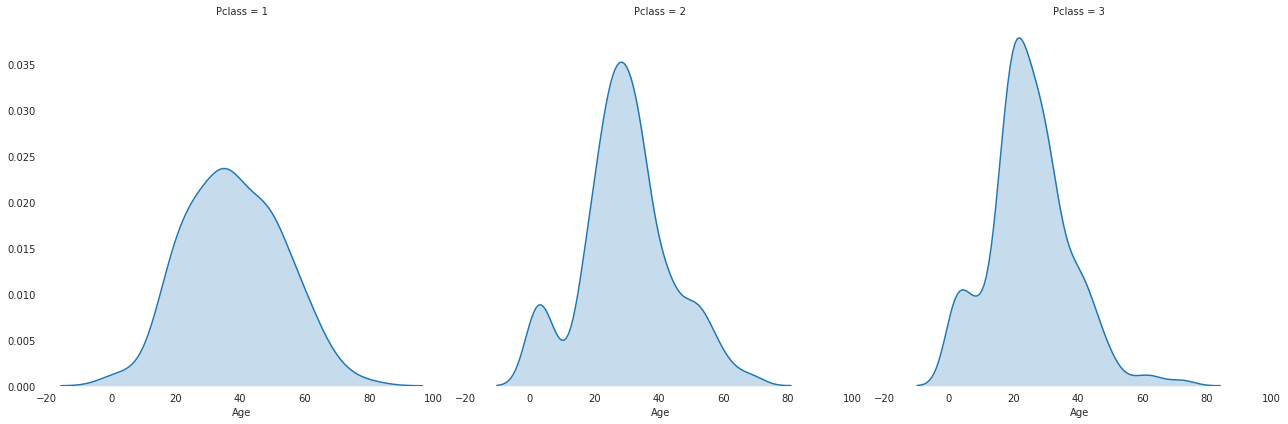

In [39]:
g = sns.FacetGrid(titanic, col='Pclass', height=6)
g.map(sns.kdeplot, 'Age', shade=True)
sns.despine(bottom=True, left=True)
plt.show()

### Creating Conditional Plots using Two Conditions

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a FacetGrid, we use the row parameter to specify the column in the dataframe we want used to subset across the rows in the grid. The best way to understand this is to see a working example.<br>

The starter code subsets the dataframe on different combinations of unique values in both the Pclass and Survived columns. Try changing the conditions to see the resulting plots.

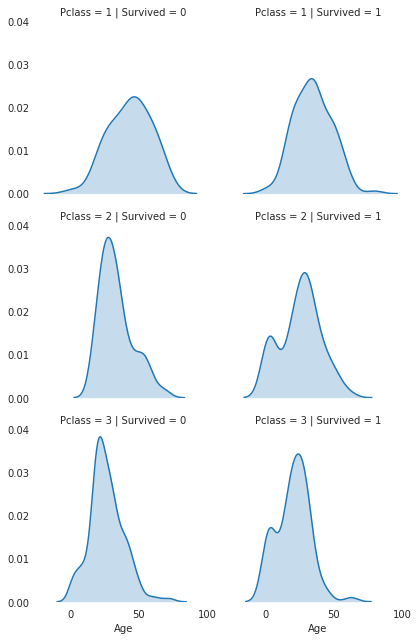

In [14]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

### Creating Conditional Plots using Three Conditions

1. Use a FacetGrid instance to generate a grid of plots using the following conditions:
    - The Survived column across the columns in the grid.
    - The Pclass column across the rows in the grid.
    - The Sex column using different hues.
2. Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
3. Each plot should have a height of 3 inches.
4. Remove all of the spines using seaborn.despine().
5. Display the plots.

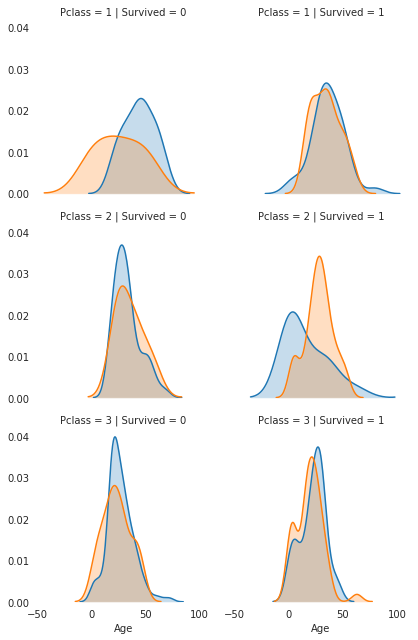

In [33]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", height=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

### Adding a Legend

1. Use a FacetGrid instance to generate a grid of plots using the following conditions:
    - The Survived column across the columns in the grid.
    - The Pclass column across the rows in the grid.
    - The Sex column using different hues.
2. Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
3. Each plot should have a height of 3 inches.
4. Remove all of the spines using seaborn.despine().
5. Add a legend for the hues representing the values in the Sex column.
6. Display the plots.

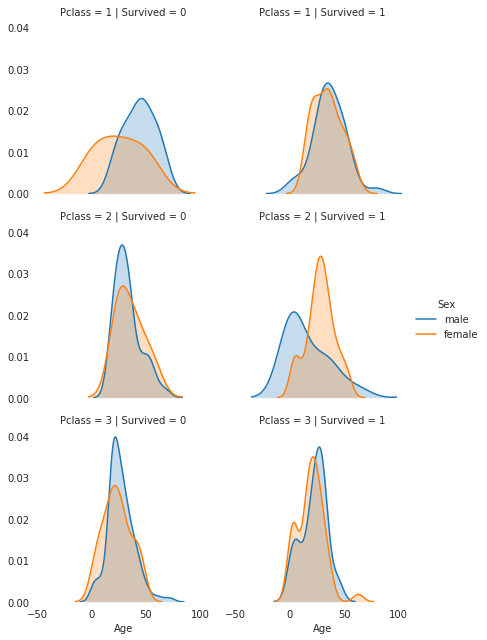

In [32]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", height=3)
g.map(sns.kdeplot, "Age", shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()